In [20]:
import pandas as pd
import networkx as nx
import datetime
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('fourCollections.csv', dtype={'collection_slug': 'str', 'asset_id': 'int', 'asset_name': 'str', 'owner_username': 'str', 'owner_address': 'str', 'event_type': 'str'})

In [22]:
# Clean Data
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('collection_slug', axis=1,inplace=True)
df.drop('asset_contract_date', axis=1, inplace=True)
pd.to_datetime(df['event_timestamp']).dt.strftime('%m/%d/%Y %H:%M')
df.drop_duplicates(keep='first')
df = df[df['event_type'] == 'successful']


In [23]:
# Sort Data
df = df[(df['event_timestamp'] > '2021-12-20T10:00') & (df['event_timestamp'] < '2022-01-01T17:00')]
df = pd.concat(g for _, g in df.groupby("asset_name") if len(g) > 1)

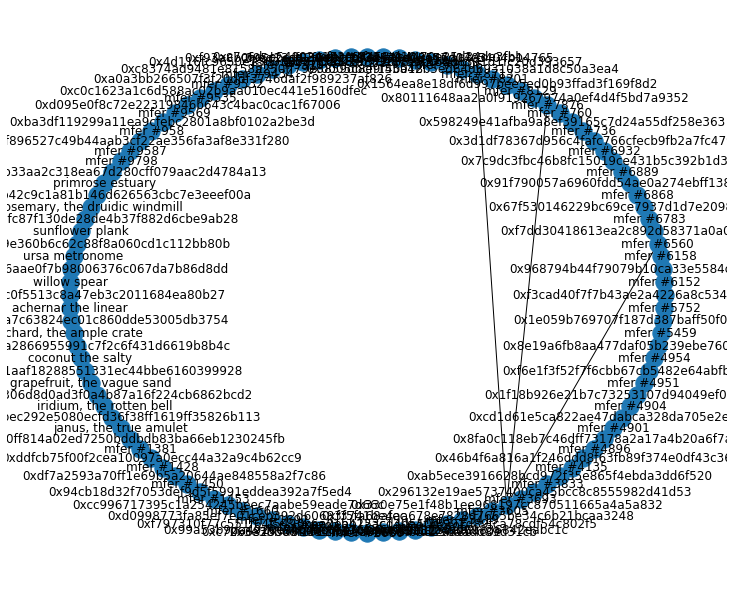

In [25]:
plt.figure(figsize=(10, 8))
G = nx.from_pandas_edgelist(df, 'owner_address', 'asset_name')

nx.draw_shell(G, with_labels=True)